Importing the various dependencies for the project:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Import the dataset:


In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

Data Pre Processing

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()


1    526
0    499
Name: target, dtype: int64

Splitting the test and train data


In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(1025, 13) (820, 13) (205, 13)


Logistic Regression Model:

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8048780487804879


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

Frequency according to sex:

In [ ]:
heart_data.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
#Compare target and sex column
pd.crosstab(heart_data.target, heart_data.sex)

sex,0,1
target,,
0,86,413
1,226,300


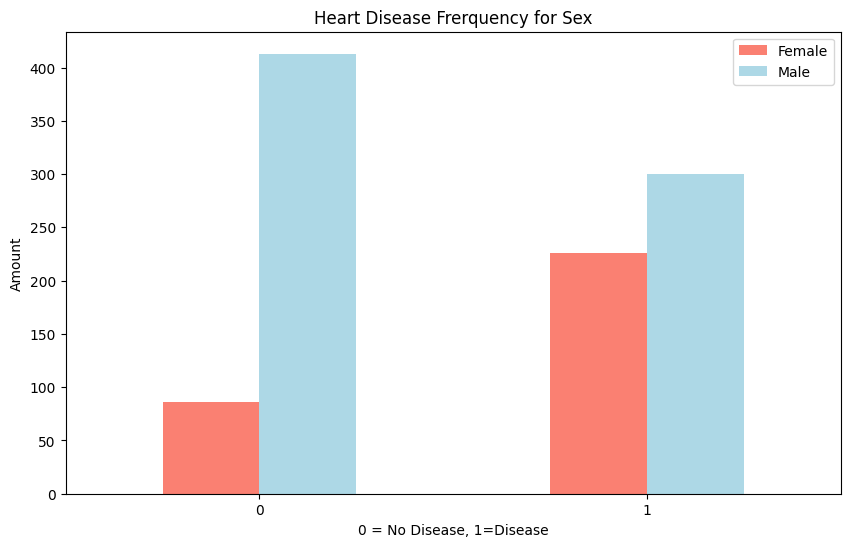

In [ ]:
#Create plot of crosstab
pd.crosstab(heart_data.target, heart_data.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

Heart Disease Frequency per Chest Pain Type
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

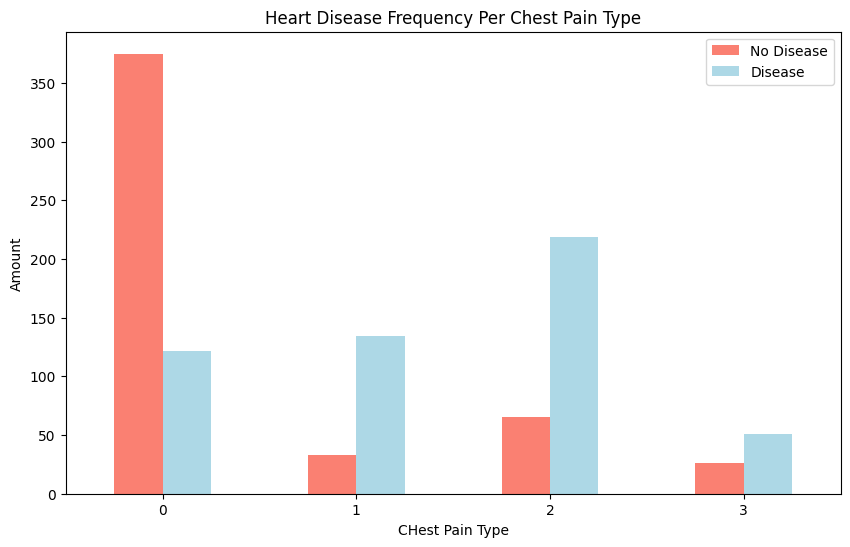

In [ ]:
# Make corsstab visualise
pd.crosstab(heart_data.cp,heart_data.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("CHest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

Correlation among features:

(14.5, -0.5)

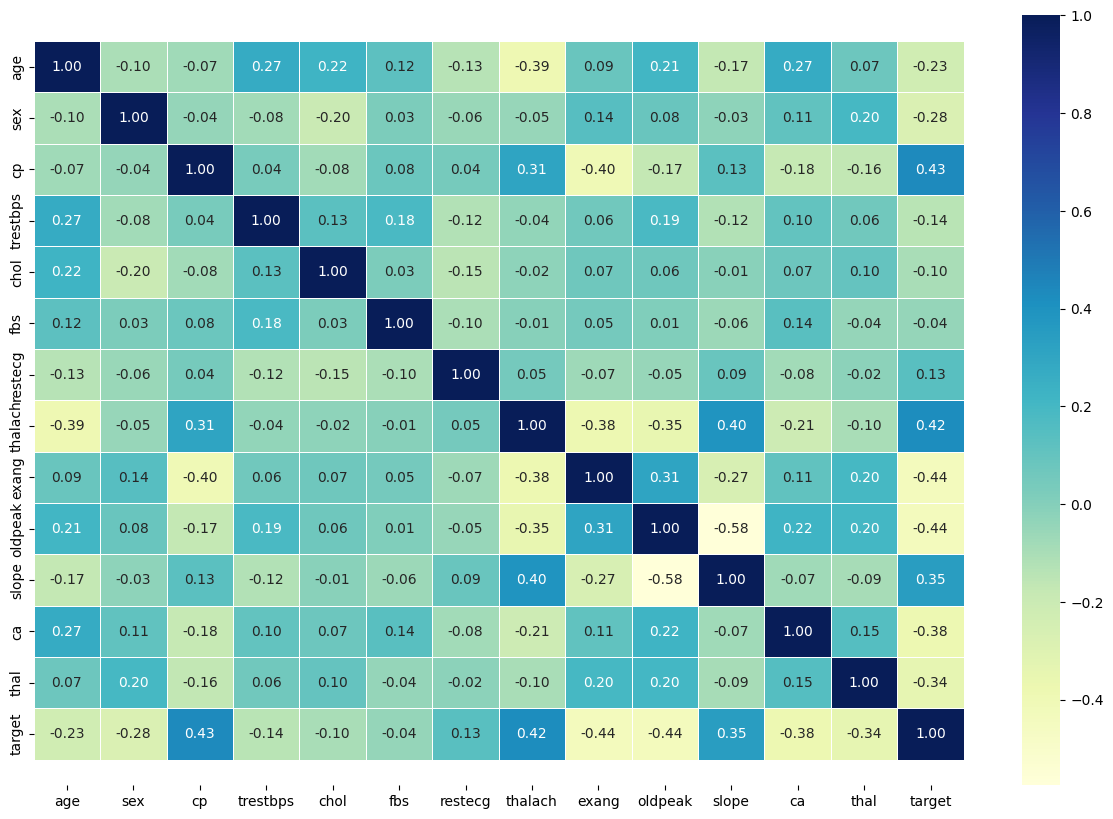

In [ ]:
#Visualise correlation
corr_matrix = heart_data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

* Testing new models: 
  * K nearest neighbour 
  * Random Forest

In [ ]:
#Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #dictionary to keep model scores
    model_scores = {}
    #loop thru models
    for name, model in models.items():
        #fit model
        model.fit(X_train, Y_train)
        #evaluate model and append score
        model_scores[name]=model.score(X_test, Y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Comparison


<Axes: >

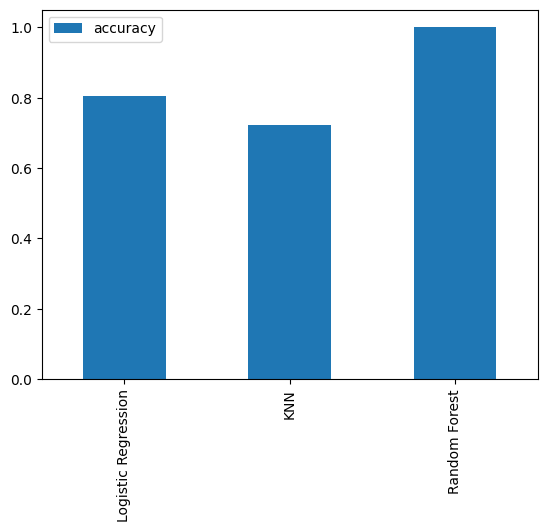

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Hyperparameter tuning by hand of KNN

In [ ]:
#Tune knn
train_scores = []
test_scores = []

#list for different values of n-neighbors
neighbors = range(1,21)

#set up knn instance
knn = KNeighborsClassifier()

#loop thru list
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(X_train, Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))

Maximum KNN score on the test data: 100.00%


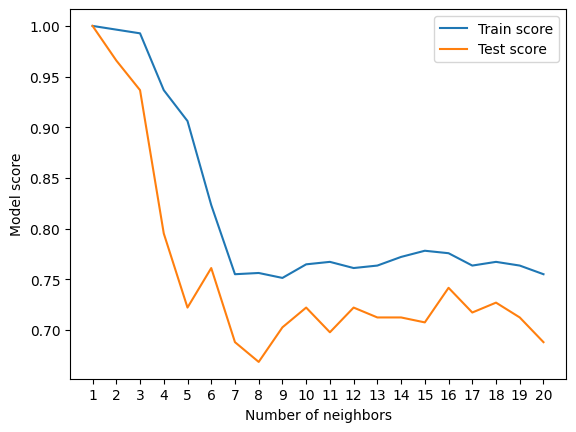

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Hyperparameter tuning with RandomizedSearchCV

Tune: 
* LogisticRegression()
* RandomForestClassifier()

In [ ]:
#Create a hyperparameter grid for LR
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

#Create a hyperparameter grid for RF
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [ ]:
rs_lr_score = rs_log_reg.score(X_test,Y_test)

In [ ]:
#Tune RF

#Set random parameter search for RF
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameter search model for RF
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
#Find best hyperparameter
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
#Evaluate the randomised search RF model
rs_rf_score =rs_rf.score(X_test, Y_test)

In [ ]:
#default model scores
model_scores

{'Logistic Regression': 0.8048780487804879,
 'KNN': 0.7219512195121951,
 'Random Forest': 1.0}

Hyperparameter Tuning with GridSearchCV
Tune: 
* LogisticRegression()

In [ ]:
#Different hyperparameters for LR model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter for LR
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit into model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [ ]:
#Evaluate grid search LR model
gs_lr_score = gs_log_reg.score(X_test,Y_test)

<Axes: >

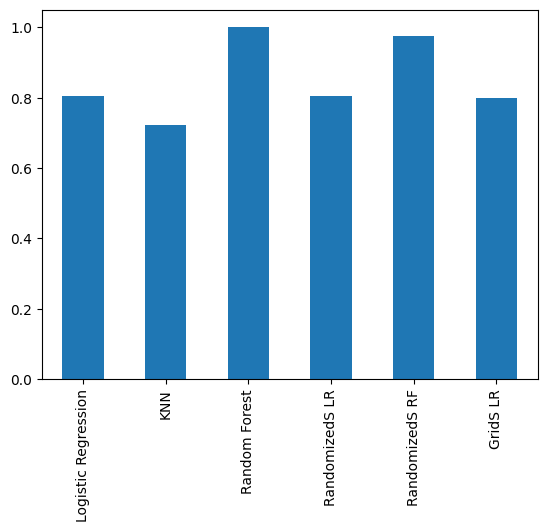

In [ ]:
model_scores.update( [('RandomizedS LR',rs_lr_score),('RandomizedS RF',rs_rf_score),('GridS LR',gs_lr_score)] )
model_compare2 = pd.DataFrame(model_scores, index=["accuracy"])
model_compare2.T.plot.bar(legend=False)

In [ ]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1])

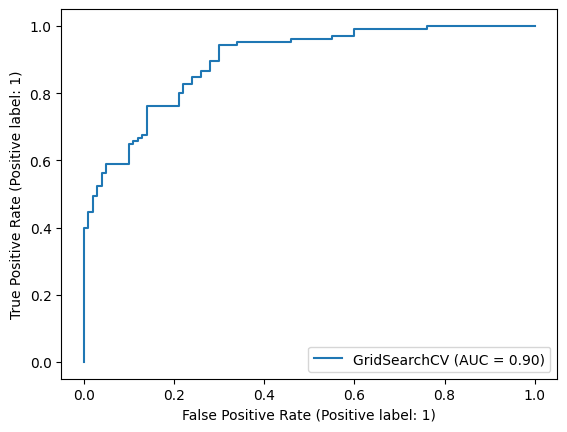

In [ ]:
#Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, Y_test)

In [ ]:
#Confusion matrix
print(confusion_matrix(Y_test, y_preds))

[[72 28]
 [13 92]]


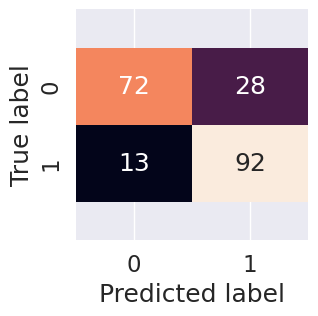

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, y_preds)

Classification report
* Cross-validated precision, recall and f1-score.

In [ ]:
#Using only one split
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       100
           1       0.77      0.88      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

